In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')
X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

$${ d }_{ rs }^{ 2 }=({ x }_{ r }-{ x }_{ s })^{ T }({ x }_{ r }-{ x }_{ s })$$

In [3]:
dists = np.zeros((len(X),len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        dists[i,j] = np.sqrt(np.sum((X[i,:]-X[j,:])**2))

In [4]:
dists

array([[ 0.        ,  0.53851648,  0.50990195, ...,  4.45982062,
         4.65080638,  4.14004831],
       [ 0.53851648,  0.        ,  0.3       , ...,  4.49888875,
         4.71805044,  4.15331193],
       [ 0.50990195,  0.3       ,  0.        , ...,  4.66154481,
         4.84871117,  4.29883705],
       ..., 
       [ 4.45982062,  4.49888875,  4.66154481, ...,  0.        ,
         0.6164414 ,  0.64031242],
       [ 4.65080638,  4.71805044,  4.84871117, ...,  0.6164414 ,
         0.        ,  0.76811457],
       [ 4.14004831,  4.15331193,  4.29883705, ...,  0.64031242,
         0.76811457,  0.        ]])

$$ [A]_{ rs }={ a }_{ rs },\quad [B]_{ rs }={ b }_{ rs }={ x }_{ r }^{ T }{ x }_{ s },\quad B=HAH,\quad H=I-\frac { 1 }{ n } 11^{ T }$$

In [5]:
n = len(dists)

H = np.eye(n) - np.ones((n, n))/n

B = -H.dot(dists**2).dot(H)/2

eig_vals,eig_vecs = np.linalg.eigh(B) #symmetric matrix에서는 eigh사용.

In [6]:
np.ones((5,5))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

$$ B=X{ X }^{ T },\quad \quad B=V\Lambda { V }^{ T },\quad X={ V }_{ 1 }{ \Lambda  }_{ 1 }^{ \frac { 1 }{ 2 }  } $$

In [7]:
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]

w = np.where(eig_vals > 0)

In [8]:
L = np.diag(np.sqrt(eig_vals[w]))

In [9]:
V = eig_vecs[:,w]
V = np.squeeze(V)


In [10]:
Y = V.dot(L)
Y[:,:3]

array([[-2.68420713,  0.32660731,  0.02151184],
       [-2.71539062, -0.16955685,  0.20352143],
       [-2.88981954, -0.13734561, -0.02470924],
       [-2.7464372 , -0.31112432, -0.03767198],
       [-2.72859298,  0.33392456, -0.0962297 ],
       [-2.27989736,  0.74778271, -0.17432562],
       [-2.82089068, -0.08210451, -0.26425109],
       [-2.62648199,  0.17040535,  0.01580151],
       [-2.88795857, -0.57079803, -0.02733541],
       [-2.67384469, -0.1066917 ,  0.1915333 ],
       [-2.50652679,  0.65193501,  0.069275  ],
       [-2.61314272,  0.02152063, -0.10765035],
       [-2.78743398, -0.22774019,  0.20032779],
       [-3.22520045, -0.50327991, -0.06841363],
       [-2.64354322,  1.1861949 ,  0.1445057 ],
       [-2.38386932,  1.34475434, -0.28373066],
       [-2.6225262 ,  0.81808967, -0.14531599],
       [-2.64832273,  0.31913667, -0.03339425],
       [-2.19907796,  0.87924409,  0.11452146],
       [-2.58734619,  0.52047364, -0.21957209],
       [-2.3105317 ,  0.39786782,  0.233

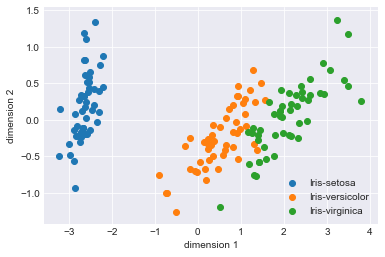

In [11]:
import matplotlib.pyplot as plt
label = np.unique(y)
with plt.style.context("seaborn-darkgrid"):
    for l in label:
        plt.scatter(Y[y==l,0], Y[y==l,1],label=l)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.legend()
    plt.show() 

In [17]:
class MDS_jay:
    def __init__(self, X, y=0, k=2, category=False):
        self.X = X
        self.k = k
        self.label = y
        self.category = category
        self.dists = np.zeros((len(self.X),len(self.X)))
        for i in range(len(self.X)):
            for j in range(len(self.X)):
                self.dists[i,j] = np.sqrt(np.sum((self.X[i,:]-self.X[j,:])**2))
        
    def mds(self):
        n = len(self.dists)
        H = np.eye(n) - np.ones((n, n))/n
        B = -H.dot(dists**2).dot(H)/2
        eig_vals,eig_vecs = np.linalg.eigh(B)
        idx = np.argsort(eig_vals)[::-1]
        eig_vals = eig_vals[idx]
        eig_vecs = eig_vecs[:,idx]
        w = np.where(eig_vals > 0)
        L = np.diag(np.sqrt(eig_vals[w]))
        V = eig_vecs[:,w]
        V = np.squeeze(V)
        Y = V.dot(L)
        self.Y = Y[:,:self.k]
        return self.Y
    def mds_plot(self):
        if self.category == True:
            label = np.unique(self.label)
            with plt.style.context("seaborn-darkgrid"):
                for l in label:
                    plt.scatter(Y[y==l,0], Y[y==l,1],label=l)
                plt.xlabel("dimension 1")
                plt.ylabel("dimension 2")
                plt.legend()
                plt.show() 
        else:
            label = [1]
            with plt.style.context("seaborn-darkgrid"):
                plt.scatter(Y[:,0], Y[:,1])
                plt.xlabel("dimension 1")
                plt.ylabel("dimension 2")
                plt.show() 


In [20]:
test = MDS_jay(X,y=y, k=2, category=True) 

In [21]:
test.mds()

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

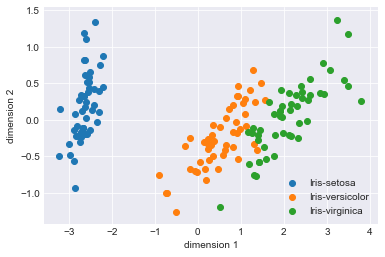

In [22]:
test.mds_plot()